<h3> Application of break, loop and function statement </h3>
The Newton method for finding the solution of algegraic and trancendal equation is given as:

$$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$
Lets take the following algebraic equation

$$f(x) = x^3 + 3x^2 + 4x + 3$$
$$f'(x) = 3x^2 + 6x + 4$$

In [1]:
#define the algebraic function and its derivative function
def f(x):
    return x**3 + 3*x**2 + 4*x + 3
def f_dot(x): #derivative of f(x)
    if x< 0.01:
        return x**2
    else:
        return x**2 + 4
    

In [2]:
max_iter = 100 #maximumu iteration to complete
x0 = 0.001 #initial guess of solution
solution = []
for i in range(100):
    x1 = x0 - f(x0)/f_dot(x0)
    print(x1)
    #condition check
    if abs(x1-x0)< 0.000001:  #check whether consecutive solution of x is repetative or not
        print("solu",x0)
        break
    x0 = x1             #to iterate

    

-3004003.0
-2.9999986682087183
-1.9999997040463158
-1.7499999260115844
-1.6938775372149912
-1.6841341246660408
-1.6826054052694137
-1.6823703465936681
-1.6823343207261756
-1.682328802050156
-1.6823279567285605
solu -1.682328802050156


In [3]:
#check the solution
f(x0) #the result should satisfy the algebraic equation to be solution

-2.392454706345859e-06

In [4]:
#lets build a function for Newton method
def newtons_method(x0,f,f_dot ,tolerance,max_iterations):
    for i in range(max_iterations):
        y = f(x0)
        ydot = f_dot(x0)

        x1 = x0 - y / ydot           # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None

In [5]:
#lets use the netwon function to obtain the results
max_iter = 100
max_tol = 0.00001
x0 = 1
#call the function
solution = newtons_method(x0,f,f_dot,max_tol,max_iter)
solution

-1.6823288020513776

<h3> Method of False Position </h3>

$$x_2 = x_1 - \frac{(x_1-x_0)f(x_0)}{f(x_1) - f(x_0)}$$

In [33]:
max_iter = 100 #maximumu iteration to complete
x0,x1 = 10,100 #initial guess of solution
solution = []
#define the algebraic function and its derivative function
def f(x):
    return x**3 + 3*x**2 + 4*x + 3
    
for i in range(100):
    x2 = x0 - ((x1 - x0)*f(x0))/(f(x1) - f(x0))
   
    #condition check
    if abs(x1-x0)< 0.000001:  #check whether consecutive solution of x is repetative or not
        print("solu",x0)
        break
    x0 = x1             #to iterate
    x1 = x2

solu -1.6823273587232637


In [7]:
#we can use the scipy library to obtain the roots of algebraic equation
from scipy.optimize import fsolve #import the function from scipy.optimize library

fsolve(f,x0)

array([-1.6823278])

<h3>Intro. to numpy array</h3>

In [34]:
a = [1,2,3,5]

In [8]:
import numpy as np

a = np.array([[1,2,3,4],
             [3,4,5,6]])


In [9]:
x = np.ones((3,4))
y = np.ones((4,3))
x

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [10]:
x.dot(y)

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

In [11]:
#finding roots with numpy
np.roots([1,3,4,3])

array([-1.6823278+0.j       , -0.6588361+1.1615414j,
       -0.6588361-1.1615414j])

<h3> Intro to graphics library </h3>


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
y = np.array([1,9,3,4,5,6,7])
x = np.array([0,1,2,3,4,5,6])

Text(0, 0.5, 'discharge $m^3/s$')

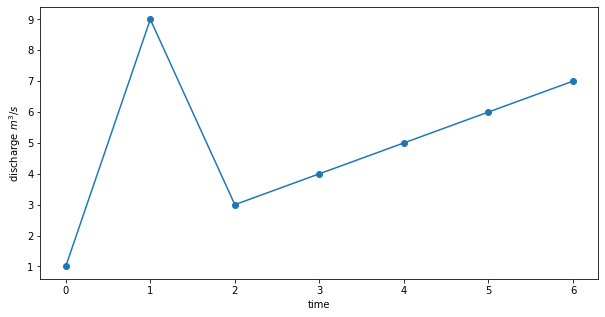

In [14]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(x,y)
ax.scatter(x,y)
ax.set_xlabel('time')
ax.set_ylabel('discharge $m^3/s$')

<h3> Interpolation </h2>

We need to find the estimation function $\hat{y}(x)$ such that $\hat{y}(x_i) = y_i$, where $x_i$ and $y_i$ are the given data points. We discuss about two of interpolation techniques viz.:

<h4> Linear Interpolation</h4>

The estimated point is assumed to lie on the line joining the nearst points to the left and right. let the data points be $(x_i, x_{i+1})$ and $(y_i, y_{i+1})$. For the point x such that $x_i \leq x \leq x_{i+1}$, we have the interpolation function as:

$$\hat{y}(x) = y_i + \frac{(y_{i+1} - y_i)(x-x_i)}{(x_{i+1} - x_i)}$$

<h4> Spline Interpolation </h4>

The estimated point is assumed to lie on the line joining the points $(x_i, x_{i+1})$ and $(y_i, y_{i+1})$ defined by the cubic polynomial$$ S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i$$.

Before applying the fuction we have to find the coefficents, the cofficents are determined using the following conditions:

$$S_i(x_i) = y_i$$
$$S_i(x_{i+1}) = y_{i+1} $$
$$S_i'(x_i) = y_i'$$
$$S_i'(x_{i+1}) = y'_{i+1} $$

The obtained linear equation are solved to find the coefficent to obtain the interpolation function.


In [4]:
#for linear and spline interpolation we use, scipy interplate class
from scipy.interpolate import interp1d,CubicSpline
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x = np.array([0, 1,1.5, 2,4,4.5,5.5,6,6.5,7,7.5,8])
y = np.cos(x)
y

array([ 1.        ,  0.54030231,  0.0707372 , -0.41614684, -0.65364362,
       -0.2107958 ,  0.70866977,  0.96017029,  0.97658763,  0.75390225,
        0.34663532, -0.14550003])

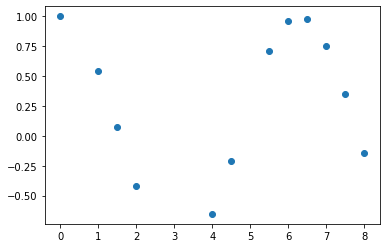

In [24]:
plt.scatter(x,y)

In [25]:
inter_f = interp1d(x,y)
inter_fc = CubicSpline(x,y)

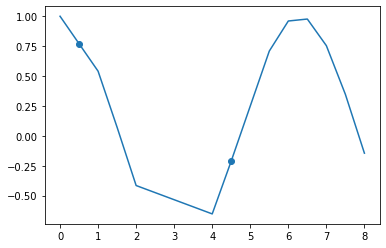

In [26]:
plt.plot(x,y)
plt.scatter([0.5,4.5],[inter_f(0.5),inter_f(4.5)])

In [13]:
inter_f(0.5)
inter_fc(0.5)

array(0.90188487)

In [27]:
inter_fc = CubicSpline(x,y)
x_test = np.linspace(0,8)
y_test = inter_fc(x_test)

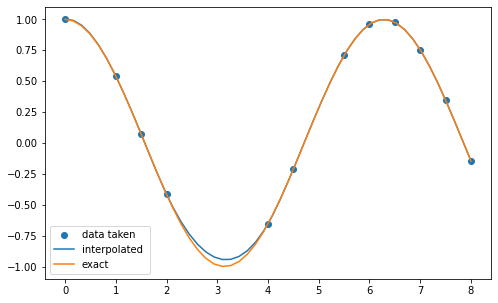

In [28]:
fig,ax = plt.subplots(figsize = (8,5))
ax.scatter(x,y, label = "data taken")
ax.plot(x_test,y_test, label= 'interpolated ')
ax.plot(x_test, np.cos(x_test), label = "exact")
ax.legend()

<h3> System of linear equation</h3>

System of linear equation can be represented in the form of:
$$Ax = B$$
where, A is the coefficent matrix, x is the vector of independent variables and B is the vector of dependent variable.
The solution can be obtained directly as:
$$x = A^{-1}B$$

Let us take an example of following system of linear equation:

$$4x + 3y + 2z = 25$$
$$-2x + 2y + 3z = -10$$
$$3x -5y + 2z = -4$$

It can be written as:

$$\begin{bmatrix} 4 & 3 & 2 \\ -2 & 2 & 3 \\ 3 & -5 & 2 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 25 \\ -10 \\ -4 \end{bmatrix}  $$
The solution for $x,y,z$ can be obtained simply as:

$$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 4 & 3 & 2 \\ -2 & 2 & 3 \\ 3 & -5 & 2 \end{bmatrix} ^{-1} \begin{bmatrix} 25 \\ -10 \\ -4 \end{bmatrix}  $$

In [7]:
import numpy as np

A = np.array([[4,3,2],
              [-2,2,3],
              [3,-5,2]])
B = np.array([[25],
              [-10],
              [-4]])
A_inv = np.linalg.inv(A)
solun = np.matmul(A_inv,B)
solun

array([[ 5.],
       [ 3.],
       [-2.]])

<h3> Intro to Pandas </h3>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("aoi_co_data.csv")
data = data.set_index('Date')

In [16]:
xdata = data['Co_concentration'].values
ydata = data['Aoi_value'].values

Text(0, 0.5, 'Air Quality Index (AOI)')

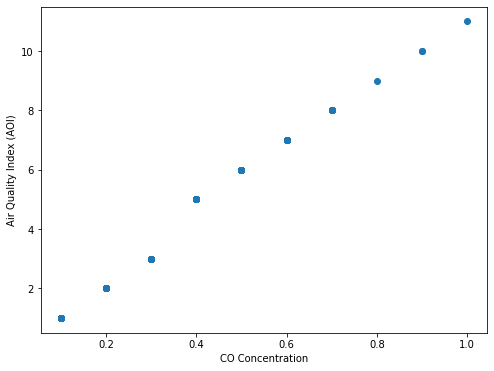

In [19]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(xdata,ydata)
ax.set_xlabel("CO Concentration")
ax.set_ylabel("Air Quality Index (AOI)")



<h3> Least Square Regression and Curve Fitting </h3>

In the above example we observe a relationship between CO concentration and air quality index. Now we are interested to find a mathematical relationship
between these two variables. 

So, least square regression problem can be stated as to find a approximate function $\hat{y}(x)$ that describes the data as accurately as possible. In least square regression the approximate function need to be linear combination of basic function $f(x)$. However, scipy library of python is powerful enough to perform regression for almost any type of estimation function (here I mean linear as well as non linear)

The algorithm works on the minimization of error of actual data and that of estimated data. Acutally, scipy curfit uses Non-linear least squares method 
to find the parameters of estimation function.

Lets say we have a m data points $(x_1,y_1)$ ,$(x_2,y_2)$ ,$(x_3,y_3)$...... ,$(x_m,y_m)$. Let the estimation function be $\hat{y}(x) = f(x,\alpha)$, where, $\alpha$ is the paramters to find such that functon S is minimized:
$$S = \sum_{i=1}^m r_i^2$$

Wheere, $r_i$ is the residuals given as:

$$r_i = y_i - f(x_i,\alpha)$$

Lets leave how the library performs the optimization.....topic for later discussion. Lets do it first.


In [35]:
#lets try a linear relationship between the variables
# y = a*x + b
from scipy.optimize import curve_fit

def est_func(x, a, b):
    return a*x + b

In [36]:
x, y = data.Co_concentration.values , data.Aoi_value.values

In [47]:
param, cov = curve_fit(est_func, x,y)
a,b = param

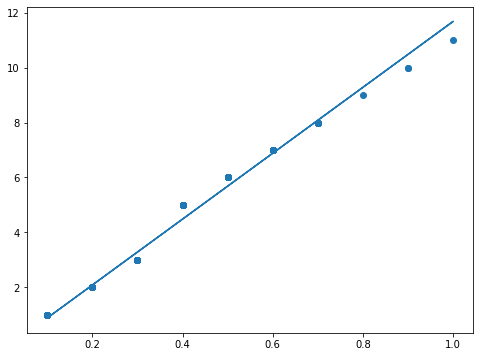

In [49]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x,y)
y_ext = est_func(x,a,b)
ax.plot(x,y_ext)